In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
sns.set_style('whitegrid')

In [3]:
data=pd.read_excel(r"C:\Users\Hp\Documents\MCS.xlsx")
data

,A,POR,Swi,Bo,h
0,490,15,17,1.105,90
1,490,16,17,1.105,90
2,490,16,18,1.106,90
3,490,17,18,1.106,90
4,490,17,20,1.106,90
5,500,17,20,1.106,100
6,500,18,22,1.106,100
7,500,18,22,1.106,100
8,500,18,22,1.106,100
9,500,18,22,1.107,100


In [8]:
data['estimate']=7758*(data['A']*(data['POR']/100)*data['Bo']*(1-data['Swi']/100))/(data['h'])
data

,A,POR,Swi,Bo,h,estimate
0,490,15,17,1.105,90,5810.787255
1,490,16,17,1.105,90,6198.173072
2,490,16,18,1.106,90,6129.037914
3,490,17,18,1.106,90,6512.102783
4,490,17,20,1.106,90,6353.271008
5,500,17,20,1.106,100,5834.636640
6,500,18,22,1.106,100,6023.404296
7,500,18,22,1.106,100,6023.404296
8,500,18,22,1.106,100,6023.404296
9,500,18,22,1.107,100,6028.850412


In [9]:
data.corr()

,A,POR,Swi,Bo,h,estimate
A,1.000000,0.906163,0.942923,0.837191,1.000000,-0.712767
POR,0.906163,1.000000,0.963460,0.871511,0.906163,-0.364158
Swi,0.942923,0.963460,1.000000,0.877429,0.942923,-0.543119
Bo,0.837191,0.871511,0.877429,1.000000,0.837191,-0.427532
h,1.000000,0.906163,0.942923,0.837191,1.000000,-0.712767
estimate,-0.712767,-0.364158,-0.543119,-0.427532,-0.712767,1.000000


In [10]:
data.describe().round(2)

,A,POR,Swi,Bo,h,estimate
count,19.00,19.00,19.00,19.00,19.00,19.00
mean,499.47,17.74,21.37,1.11,99.47,6012.79
std,7.05,1.19,2.45,0.00,7.05,202.19
min,490.00,15.00,17.00,1.10,90.00,5679.13
25%,495.00,17.00,20.00,1.11,95.00,5906.33
50%,500.00,18.00,22.00,1.11,100.00,6028.85
75%,500.00,18.00,22.00,1.11,100.00,6028.85
max,510.00,20.00,25.00,1.11,110.00,6512.10


Text(0.5, 1.0, 'Reserve estimate')

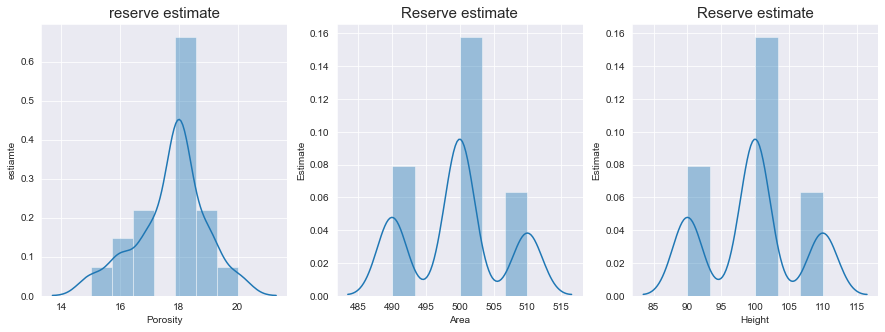

In [13]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5)) #To obtain side-by-side subplots, pass parameters 1, 2 for one row and two columns.
#plt.subplots(1,2) is 1 is number of rows and 2 is number of columns
ax1 = sns.distplot(data["POR"],ax=ax1)
sns.set_style("darkgrid")
ax1.set_xlabel("Porosity",fontsize=10)
ax1.set_ylabel("estiamte",fontsize=10)
ax1.set_title("reserve estimate",fontsize=15)

ax2=sns.distplot(data["A"],ax=ax2)
ax2.set_xlabel("Area",fontsize=10)
ax2.set_ylabel("Estimate",fontsize=10)
ax2.set_title("Reserve estimate",fontsize=15)

ax3=sns.distplot(data["h"],ax=ax3)
ax3.set_xlabel("Height",fontsize=10)
ax3.set_ylabel("Estimate",fontsize=10)
ax3.set_title("Reserve estimate",fontsize=15)




In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [15]:
# declare X (Predictor) and y(Target)
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [16]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
#Create the regressor: reg
reg = LinearRegression()

In [18]:
#Fit the regressor to the training data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

In [20]:
# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 25.959666957433175


In [21]:
print('Variance score: %.2f' % reg.score(X_test, y_test)) 

Variance score: 0.99


In [22]:
print("R2 score : %.2f" % r2_score(y_test,y_pred))

R2 score : 0.99


In [24]:
print(y_pred.mean())

6000.0
